# Data Relevance and Purpose
##### Why I chose this topic
As a soon-to-be new-grad, I have looked into jobs that would allow me to work close to home. Many of these jobs are located in Washington, D.C. So, like many of my peers, I have looked into what areas I could potentially see myself moving to. Of course, a big factor I was curious about was safety. I believe that this dataset on crimes in DC would make for an interesting, useful, and visually appealing web-application.
##### Uses of this data
Other than being useful for students like me, this dataset is also useful to anyone else looking to move to the DC area, people invested into real-estate, business looking to open in DC, police wanting to investigate trends, and policy makers wanting to understand their communities' needs.

# Data Cleaning
The data was sourced from crimemaps.dc.gov and contains registered crimes from 2007 to 2017.

This dataset was accessed from Kaggle and will come in an initial csv titled 'dc_crime_add_vars.csv'

https://www.kaggle.com/datasets/vinchinzu/dc-metro-crime-data/data

In [166]:
# install packages
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt

In [167]:
# load initial data
crime = pd.read_csv('data/dc_crime_add_vars.csv')
crime.head()

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


In [168]:
# drop columns with irrelavent or redundant information
crime.drop(['Unnamed: 0', 'X', 'REPORT_DAT', 'BLOCK_GROUP', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE', 'optional', 
            'year', 'month', 'day', 'hour', 'minute', 'second', 'EW', 'NS', 'quad', 'CENSUS_TRACT', 'NEIGHBORHOOD_CLUSTER'], axis=1, inplace=True)

In [169]:
# create better column headers and reorder columns
crime.columns = ['Time of Day', 'Offense', 'Method', 'Block', 'Police District', 'PSA', 'Ward', 'ANC', 'Longitude', 'Latitude', 'Date', 'Violence']
crime = crime.iloc[:,[10,0,1,2,11,3,4,5,6,7,8,9]]

In [170]:
# show basic info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             342867 non-null  object 
 1   Time of Day      342867 non-null  object 
 2   Offense          342867 non-null  object 
 3   Method           342867 non-null  object 
 4   Violence         342867 non-null  object 
 5   Block            342867 non-null  object 
 6   Police District  342667 non-null  float64
 7   PSA              342616 non-null  float64
 8   Ward             342867 non-null  int64  
 9   ANC              342867 non-null  object 
 10  Longitude        342867 non-null  float64
 11  Latitude         342867 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 31.4+ MB


In [171]:
# convert date from str to datetime
crime['Date'] = pd.to_datetime(crime['Date'])

# replace 'OTHERS' with 'OTHER' in Method
crime['Method'] = crime['Method'].replace('OTHERS', 'OTHER')

# convert Police Districts to str
crime['Police District'] = crime['Police District'].astype(str)

# convert PSA to str
crime['PSA'] = crime['PSA'].astype(str)

# convert Ward to str
crime['Ward'] = crime['Ward'].astype(str)

In [172]:
# check for null values
crime.isnull().sum()

Date               0
Time of Day        0
Offense            0
Method             0
Violence           0
Block              0
Police District    0
PSA                0
Ward               0
ANC                0
Longitude          0
Latitude           0
dtype: int64

In [173]:
# write to csv
crime.to_csv('data/data.csv')

In [174]:
# prepared dataset
crime.head()

,Date,Time of Day,Offense,Method,Violence,Block,Police District,PSA,Ward,ANC,Longitude,Latitude
0,2008-08-31 20:47:00,EVENING,THEFT/OTHER,OTHER,Non-Violent,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,-77.070209,38.913633
1,2008-09-01 00:45:00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHER,Non-Violent,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,-77.045323,38.908564
2,2008-09-01 03:00:00,MIDNIGHT,THEFT/OTHER,OTHER,Non-Violent,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,-77.027045,38.899057
3,2008-09-09 07:46:00,DAY,THEFT/OTHER,OTHER,Non-Violent,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,-77.040089,38.909638
4,2008-08-24 20:00:00,EVENING,MOTOR VEHICLE THEFT,OTHER,Non-Violent,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,-77.019377,38.894573


# Exploratory Data Analysis

In [175]:
# updated info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             342867 non-null  datetime64[ns]
 1   Time of Day      342867 non-null  object        
 2   Offense          342867 non-null  object        
 3   Method           342867 non-null  object        
 4   Violence         342867 non-null  object        
 5   Block            342867 non-null  object        
 6   Police District  342867 non-null  object        
 7   PSA              342867 non-null  object        
 8   Ward             342867 non-null  object        
 9   ANC              342867 non-null  object        
 10  Longitude        342867 non-null  float64       
 11  Latitude         342867 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 31.4+ MB


### Distribution of Crimes by Date

Text(0.5, 0, 'Year')

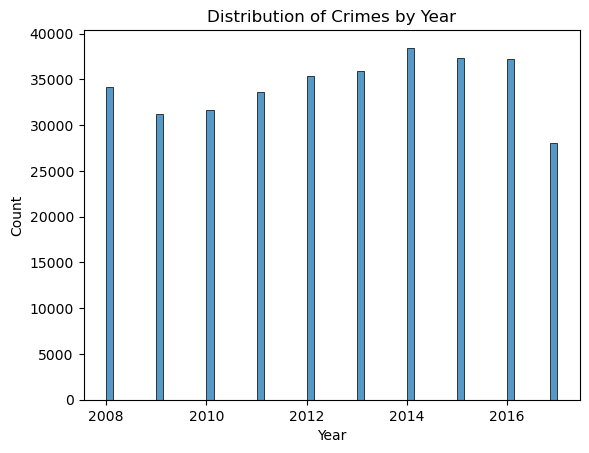

In [176]:
years = crime['Date'].dt.year
plt.figure()
sns.histplot(years)
plt.title('Distribution of Crimes by Year')
plt.xlabel('Year')

In [177]:
# determine average number of crimes per year
years.value_counts().mean()

34286.7

Text(0.5, 0, 'Month')

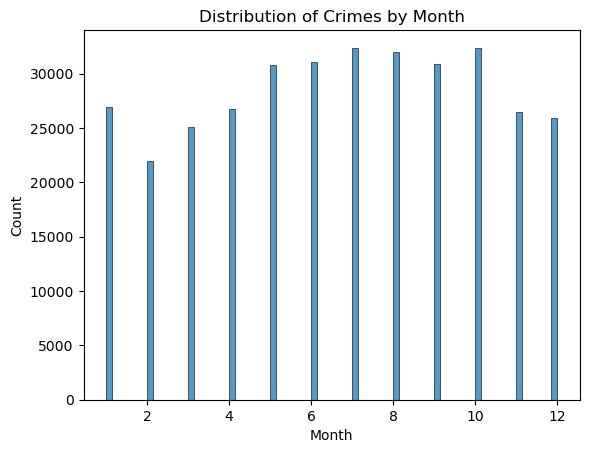

In [178]:
months = crime['Date'].dt.month
plt.figure()
sns.histplot(months)
plt.title('Distribution of Crimes by Month')
plt.xlabel('Month')

### Distribution of Crimes by Categorical Variables

In [179]:
# check categorical data value counts
categorical_variables = ['Time of Day','Offense', 'Method', 'Violence', 'Police District', 'PSA', 'Ward', 'ANC']

for var in categorical_variables:   
    print(crime[var].value_counts())
    print('-------------------------')

Time of Day
EVENING     145549
DAY         131898
MIDNIGHT     65420
Name: count, dtype: int64
-------------------------
Offense
THEFT/OTHER                   130435
THEFT F/AUTO                   85287
ROBBERY                        35267
MOTOR VEHICLE THEFT            33188
BURGLARY                       31292
ASSAULT W/DANGEROUS WEAPON     23436
SEX ABUSE                       2402
HOMICIDE                        1234
ARSON                            326
Name: count, dtype: int64
-------------------------
Method
OTHER    310658
GUN       20996
KNIFE     11213
Name: count, dtype: int64
-------------------------
Violence
Non-Violent    280528
Violent         62339
Name: count, dtype: int64
-------------------------
Police District
1.0    58373
3.0    57321
2.0    54449
5.0    45518
4.0    44906
6.0    43886
7.0    38214
nan      200
Name: count, dtype: int64
-------------------------
PSA
208.0    12810
207.0    12559
302.0    12296
107.0     9697
206.0     9561
305.0     9538
104.0   

Text(0.5, 1.0, 'Distribution of Crimbes by Time of Day')

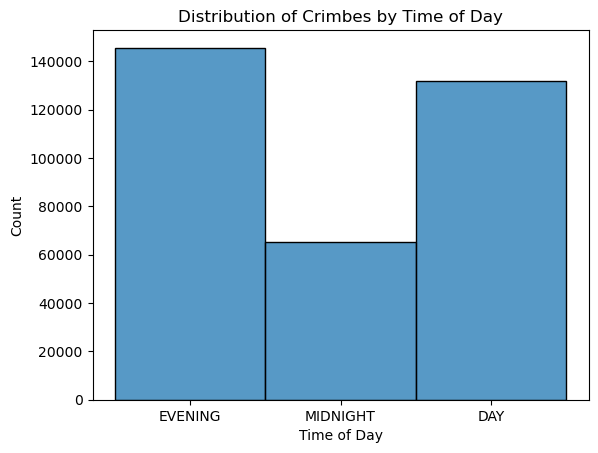

In [180]:
sns.histplot(crime['Time of Day'])
plt.title('Distribution of Crimbes by Time of Day')

Text(0.5, 1.0, 'Distribution of Crimes by Offense')

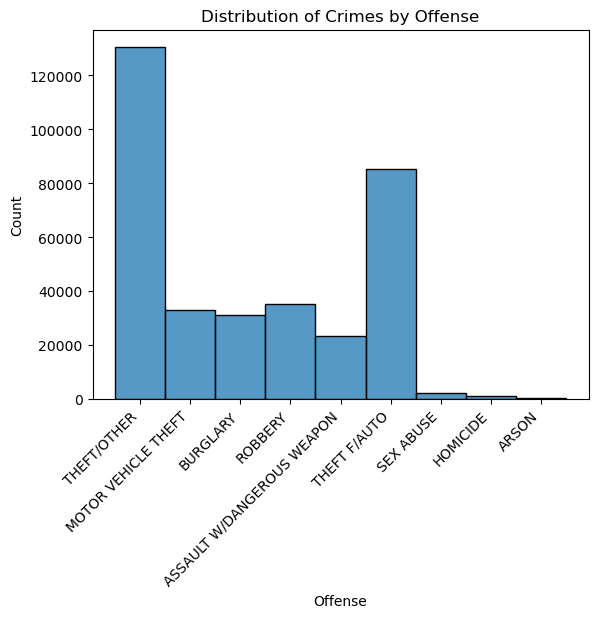

In [181]:
sns.histplot(crime['Offense'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crimes by Offense')

Text(0.5, 1.0, 'Distribution of Crimes by Method')

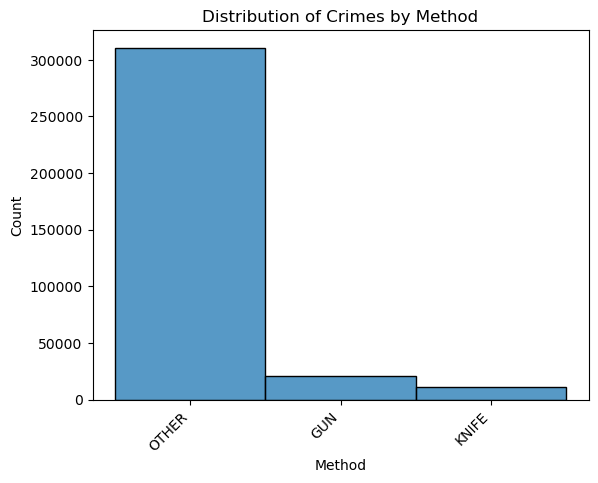

In [182]:
sns.histplot(crime['Method'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crimes by Method')

Text(0.5, 1.0, 'Distribution of Crimes by Violence')

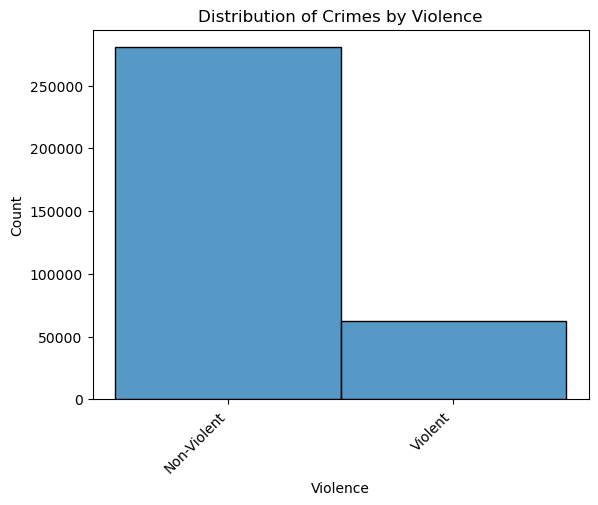

In [183]:
sns.histplot(crime['Violence'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crimes by Violence')

Text(0.5, 1.0, 'Distribution of Crimes by Police District')

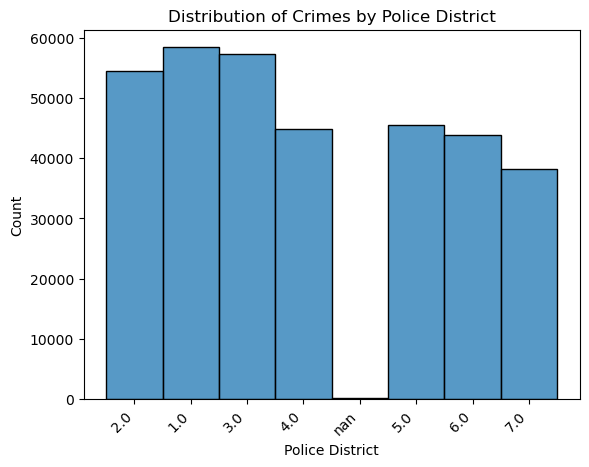

In [184]:
sns.histplot(crime['Police District'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crimes by Police District')

Text(0.5, 1.0, 'Distribution of Crimes by Ward')

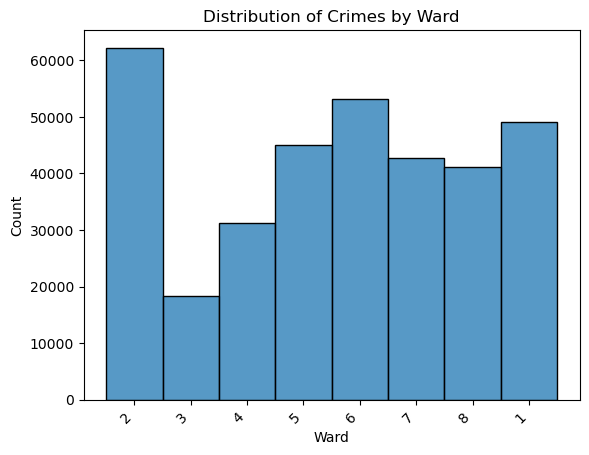

In [185]:
sns.histplot(crime['Ward'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Crimes by Ward')

Text(0.5, 1.0, 'Distribution of Crimes by ANC')

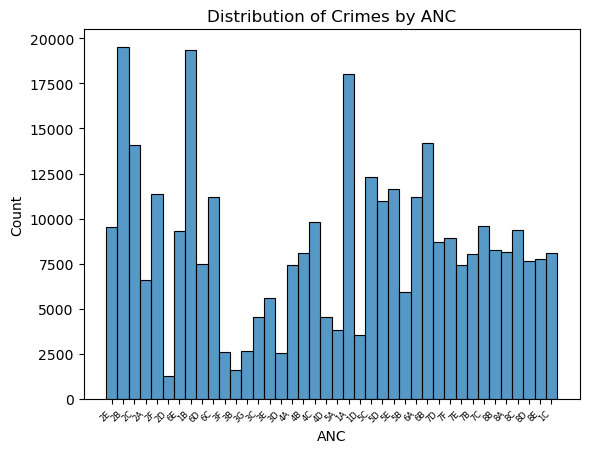

In [186]:
sns.histplot(crime['ANC'])
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.title('Distribution of Crimes by ANC')

### Commentary
Above, it can be seen that a similar number of crimes occurred each year with a peak in 2014 and a low in 2017. However, the low in 2017 could likely be due to the fact that not a full year was recorded; therefore, 2009 could also be considered the low year of this dataset. On average, approximately 34,287 crimes occurred per year. When broken down into months, the colder months seem to exhibit less crimes than the warmer months. February most likely has much less recorded crimes due to it being a shorter month.

It's seen that most crimes occur during the night.

Majority of crimes are non-violent and are related to theft. Of the crimes that are violent, guns were used more often than knives. Given the data, it's unknown if another form of violence was a more common method than guns.

Police districts 1, 2, and 3 exhibit more registered crimes than districts 4, 5, 6, and 7.

Ward 2 has the most registered crimes when compared to the other wards. Wards 1, 5, 6, 7, and 8 have a similarly high number of registered crimes. Ward 4 shows less crime than the rest of the wards and ward 3 shows the least amount of registered crime.

# Data Dictionary
**Date** - (datetime object) - occurance of registered crime

**Time of Day** - (str) - Time of day the crime occurred. For example, evening.

**Offense** - (str) - Type of crime. For example, theft.

**Method** - (str) - Method used to perform crime. For example, using a firearm.

**Violence** - (str) - Whether or not the crime was violent.

**Block** - (str) - Address of the block the crime occurred.

**Police District** - (str) - The police district who oversees the area which the crime occurred.

**PSA** - (str) - Police service area. The subdivision of the police district which oversees the area which the crime occurred.

**Ward** - (str) - The division of the city which the crime occurred.

**ANC** - (str) - Advisory neighbor commissions. Neighborhood body of the area which the crime occurred.

**Longitude** - (float) - Longitude coordinate of the location of the crime.

**Latitude** - (float) - Latitude coordinate of the location of the crime.

# Dashboard Brainstorm

**UI**
- Slider to allow the user to select a date range
- Radio button to toggle day or night crimes
- Multi-select dropdown to allow the user to filter by different categories such as wards

**Visualizations**

- Interative graph that shows pins of where crimes have occurred (bonus for changing theme based on time of day, highlighting wards / districts, and having tooltips for pins)
- Updating table to show information associated with displayed crimes
- Informative page displaying figures with insights on crime data